In [2]:
import numpy as np
from astropy.io import fits
from astropy.table import Table, join
import matplotlib.pyplot as plt

data = '/Users/droryn/prog/lvm/lvmdrp/'

In [16]:
with fits.open(data+'GALAH_DR3_main_allstar_v2.fits') as hdu:
    GALAH = Table(hdu[1].data)


print(GALAH.colnames)

['star_id', 'sobject_id', 'dr2_source_id', 'dr3_source_id', 'survey_name', 'field_id', 'flag_repeat', 'wg4_field', 'wg4_pipeline', 'flag_sp', 'teff', 'e_teff', 'irfm_teff', 'irfm_ebv', 'irfm_ebv_ref', 'logg', 'e_logg', 'fe_h', 'e_fe_h', 'flag_fe_h', 'fe_h_atmo', 'vmic', 'vbroad', 'e_vbroad', 'chi2_sp', 'alpha_fe', 'e_alpha_fe', 'nr_alpha_fe', 'flag_alpha_fe', 'flux_A_Fe', 'chi_A_Fe', 'Li_fe', 'e_Li_fe', 'nr_Li_fe', 'flag_Li_fe', 'C_fe', 'e_C_fe', 'nr_C_fe', 'flag_C_fe', 'O_fe', 'e_O_fe', 'nr_O_fe', 'flag_O_fe', 'Na_fe', 'e_Na_fe', 'nr_Na_fe', 'flag_Na_fe', 'Mg_fe', 'e_Mg_fe', 'nr_Mg_fe', 'flag_Mg_fe', 'Al_fe', 'e_Al_fe', 'nr_Al_fe', 'flag_Al_fe', 'Si_fe', 'e_Si_fe', 'nr_Si_fe', 'flag_Si_fe', 'K_fe', 'e_K_fe', 'nr_K_fe', 'flag_K_fe', 'Ca_fe', 'e_Ca_fe', 'nr_Ca_fe', 'flag_Ca_fe', 'Sc_fe', 'e_Sc_fe', 'nr_Sc_fe', 'flag_Sc_fe', 'Sc2_fe', 'e_Sc2_fe', 'nr_Sc2_fe', 'flag_Sc2_fe', 'Ti_fe', 'e_Ti_fe', 'nr_Ti_fe', 'flag_Ti_fe', 'Ti2_fe', 'e_Ti2_fe', 'nr_Ti2_fe', 'flag_Ti2_fe', 'V_fe', 'e_V_fe', '

In [18]:
lvm_observed_stars = Table.read(data+'gaia_stars.txt', format='ascii')
lvm_stars = Table.read(data+'catalog_stars.txt', format='ascii')
join(lvm_stars, lvm_observed_stars, keys='gaia_dr3_id')

gaia_dr3_id
int64


In [19]:
join(GALAH, lvm_observed_stars, keys_left='dr3_source_id', keys_right='gaia_dr3_id')

star_id,sobject_id,dr2_source_id,dr3_source_id,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,teff,e_teff,irfm_teff,irfm_ebv,irfm_ebv_ref,logg,e_logg,fe_h,e_fe_h,flag_fe_h,fe_h_atmo,vmic,vbroad,e_vbroad,chi2_sp,alpha_fe,e_alpha_fe,nr_alpha_fe,flag_alpha_fe,flux_A_Fe,chi_A_Fe,Li_fe,e_Li_fe,nr_Li_fe,flag_Li_fe,C_fe,e_C_fe,nr_C_fe,flag_C_fe,O_fe,e_O_fe,nr_O_fe,flag_O_fe,Na_fe,e_Na_fe,nr_Na_fe,flag_Na_fe,Mg_fe,e_Mg_fe,nr_Mg_fe,flag_Mg_fe,Al_fe,e_Al_fe,nr_Al_fe,flag_Al_fe,Si_fe,e_Si_fe,nr_Si_fe,flag_Si_fe,K_fe,e_K_fe,nr_K_fe,flag_K_fe,Ca_fe,e_Ca_fe,nr_Ca_fe,flag_Ca_fe,Sc_fe,e_Sc_fe,nr_Sc_fe,flag_Sc_fe,Sc2_fe,e_Sc2_fe,nr_Sc2_fe,flag_Sc2_fe,Ti_fe,e_Ti_fe,nr_Ti_fe,flag_Ti_fe,Ti2_fe,e_Ti2_fe,nr_Ti2_fe,flag_Ti2_fe,V_fe,e_V_fe,nr_V_fe,flag_V_fe,Cr_fe,e_Cr_fe,nr_Cr_fe,flag_Cr_fe,Cr2_fe,e_Cr2_fe,nr_Cr2_fe,flag_Cr2_fe,Mn_fe,e_Mn_fe,nr_Mn_fe,flag_Mn_fe,Co_fe,e_Co_fe,nr_Co_fe,flag_Co_fe,Ni_fe,e_Ni_fe,nr_Ni_fe,flag_Ni_fe,Cu_fe,e_Cu_fe,nr_Cu_fe,flag_Cu_fe,Zn_fe,e_Zn_fe,nr_Zn_fe,flag_Zn_fe,Rb_fe,e_Rb_fe,nr_Rb_fe,flag_Rb_fe,Sr_fe,e_Sr_fe,nr_Sr_fe,flag_Sr_fe,Y_fe,e_Y_fe,nr_Y_fe,flag_Y_fe,Zr_fe,e_Zr_fe,nr_Zr_fe,flag_Zr_fe,Mo_fe,e_Mo_fe,nr_Mo_fe,flag_Mo_fe,Ru_fe,e_Ru_fe,nr_Ru_fe,flag_Ru_fe,Ba_fe,e_Ba_fe,nr_Ba_fe,flag_Ba_fe,La_fe,e_La_fe,nr_La_fe,flag_La_fe,Ce_fe,e_Ce_fe,nr_Ce_fe,flag_Ce_fe,Nd_fe,e_Nd_fe,nr_Nd_fe,flag_Nd_fe,Sm_fe,e_Sm_fe,nr_Sm_fe,flag_Sm_fe,Eu_fe,e_Eu_fe,nr_Eu_fe,flag_Eu_fe,ra_dr2,dec_dr2,parallax_dr2,parallax_error_dr2,r_est_dr2,r_lo_dr2,r_hi_dr2,r_len_dr2,rv_galah,e_rv_galah,rv_gaia_dr2,e_rv_gaia_dr2,red_flag,ebv,snr_c1_iraf,snr_c2_iraf,snr_c3_iraf,snr_c4_iraf,flag_guess,v_jk,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual_tmass,w2mpro,w2mpro_error,ph_qual_wise,a_ks,e_a_ks,bc_ks,ruwe_dr2,gaia_dr3_id
str16,int64,int64,int64,str12,int64,int64,str6,str4,int64,float32,float64,float32,float32,str3,float32,float64,float32,float64,int64,float32,float32,float32,float64,float32,float64,float64,float64,int64,float32,float32,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,int64,float64,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,str3,float64,float64,str4,float64,float64,float32,float64,int64
04063296+1422102,140824006301106,39023561753549056,39023561753549056,other,-1,0,10k_61,lbol,0,6560.7554,71.73594600387209,6383.0,0.006,bay,4.0375133,0.1763295375335304,-0.07052803,0.054197373797295965,0,-0.0923908,1.6561563,29.843597,2.1825318449141187,1.0139071,0.04784445764179679,0.017938702097824034,7.0,0,0.25199986,1.662117,1.8382007598876953,0.034986368792175586,1,0,0.08017044067382884,0.05072278839792415,1,0,0.07690952301025433,0.0614928102249977,1,0,0.2394842529296879,0.023949991471299413,1,0,-0.06975564956665004,0.03292187427324439,1,0,0.0012229347229002485,0.028145324714047074,1,0,0.11247041702270533,0.02800654725551399,1,0,-0.08298093795776396,0.03964009352200385,1,0,0.07653648376464872,0.03314971577400257,1,0,0.21524700164794908,0.02159819400485119,1,0,nan,nan,0,0,nan,nan,-9223372036854775808,32,nan,nan,-92233720368547758

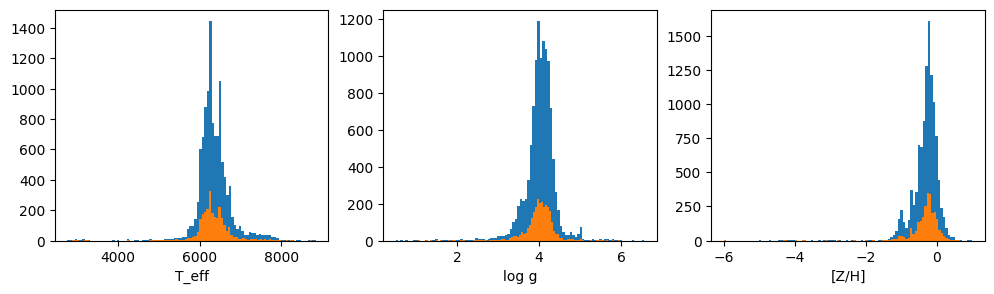

In [19]:
# https://sdss-wiki.atlassian.net/wiki/spaces/LVM/pages/14460157/Calibration+Stars
LVM = Table.read(data+'Gaia_stars_5-9_ftype_v4.fits.gz', format='fits')
lvm_observed_stars = Table.read(data+'gaia_stars.txt', format='ascii')
t2 = join(LVM, lvm_observed_stars, keys_left='source_id', keys_right='gaia_dr3_id')

#LVM.write(data+'Gaia_stars_5-9_ftype_v4.fits', format='fits')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
ax1.hist(LVM['teff_gspspec'], bins=100)
ax1.hist(t2['teff_gspspec'], bins=100)
ax1.set(xlabel='T_eff')

ax2.hist(LVM['logg_gspspec'], bins=100)
ax2.hist(t2['logg_gspspec'], bins=100)
ax2.set(xlabel='log g')
ax3.hist(LVM['mh_gspspec'], bins=100)
ax3.hist(t2['mh_gspspec'], bins=100)
ax3.set(xlabel='[Z/H]')
plt.show()

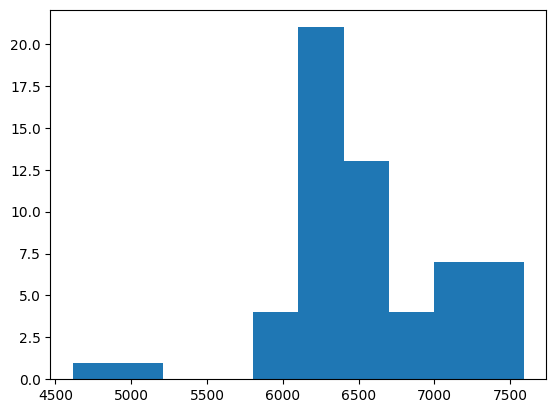

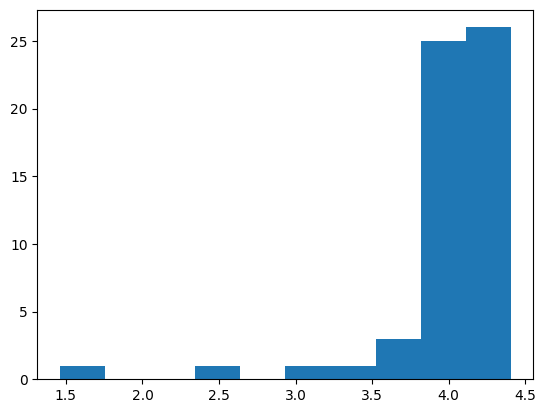

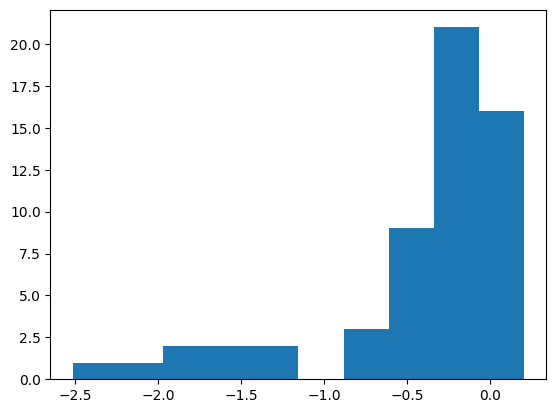

In [24]:
t2 = join(GALAH, LVM, keys_left='dr3_source_id', keys_right='source_id')
plt.hist(t2['teff'])
plt.show()
plt.hist(t2['logg'])
plt.show()
plt.hist(t2['fe_h'])
plt.show()


In [14]:
tf = Table.read(data+'Gaia_stars_5-9_ftype_v4.fits',memmap=True)

/opt/miniconda/envs/lvmdrp/lib/python3.12/site-packages/astropy/io/fits/fitsrec.py:700: UserWarning: Field 'flags_espucd' has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(


ValueError: Inconsistent data column lengths: {0, 18490}

['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40', 'col41', 'col42', 'col43', 'col44', 'col45', 'col46', 'col47', 'col48', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'col57', 'col58', 'col59', 'col60', 'col61', 'col62', 'col63', 'col64', 'col65', 'col66', 'col67', 'col68', 'col69', 'col70', 'col71', 'col72', 'col73', 'col74', 'col75', 'col76', 'col77', 'col78', 'col79', 'col80', 'col81', 'col82', 'col83', 'col84', 'col85', 'col86', 'col87', 'col88', 'col89', 'col90', 'col91', 'col92', 'col93', 'col94', 'col95', 'col96', 'col97', 'col98', 'col99', 'col100', 'col101', 'col102', 'col103', 'col104', 'col105', 'col106', 'col107', 'col108', 'col109', 'col110',